In [1]:
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [2]:
# data import
data = Path('resources/airline.csv',  index_col= 1)
df = pd.read_csv(data)
df.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
# data import
test_data = Path('resources/test.csv',  index_col= 1)
test_df = pd.read_csv(test_data)
test_df.head()

,Unnamed: 0,id,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer                           129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type_of_Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi                      129880 non-null  int64  
 7   Departure/Arrival_time_convenient  129880 non-null  int64  
 8   Ease_of_Online booking             129880 non-null  int64  
 9   Gate_location                      129880 non-null  int64  
 10  Food_and_drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer                           25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type_of_Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi                      25976 non-null  int64  
 9   Departure/Arrival_time_convenient  25976 non-null  int64  
 10  Ease_of_Online booking             25976 non-null  int64  
 11  Gate_location                      25976 non-null  int

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival_time_convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease_of_Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate_location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food_and_drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [7]:
# find all null values
df.isnull().sum()

Gender                                 0
Customer                               0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi                          0
Departure/Arrival_time_convenient      0
Ease_of_Online booking                 0
Gate_location                          0
Food_and_drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

In [8]:
# find all null values for test DataFrame
test_df1 = test_df.drop(columns=['Unnamed: 0','id'])
test_df1.isnull().sum()

Gender                                0
Customer                              0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi                         0
Departure/Arrival_time_convenient     0
Ease_of_Online booking                0
Gate_location                         0
Food_and_drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
satisfaction                          0
dtype: int64

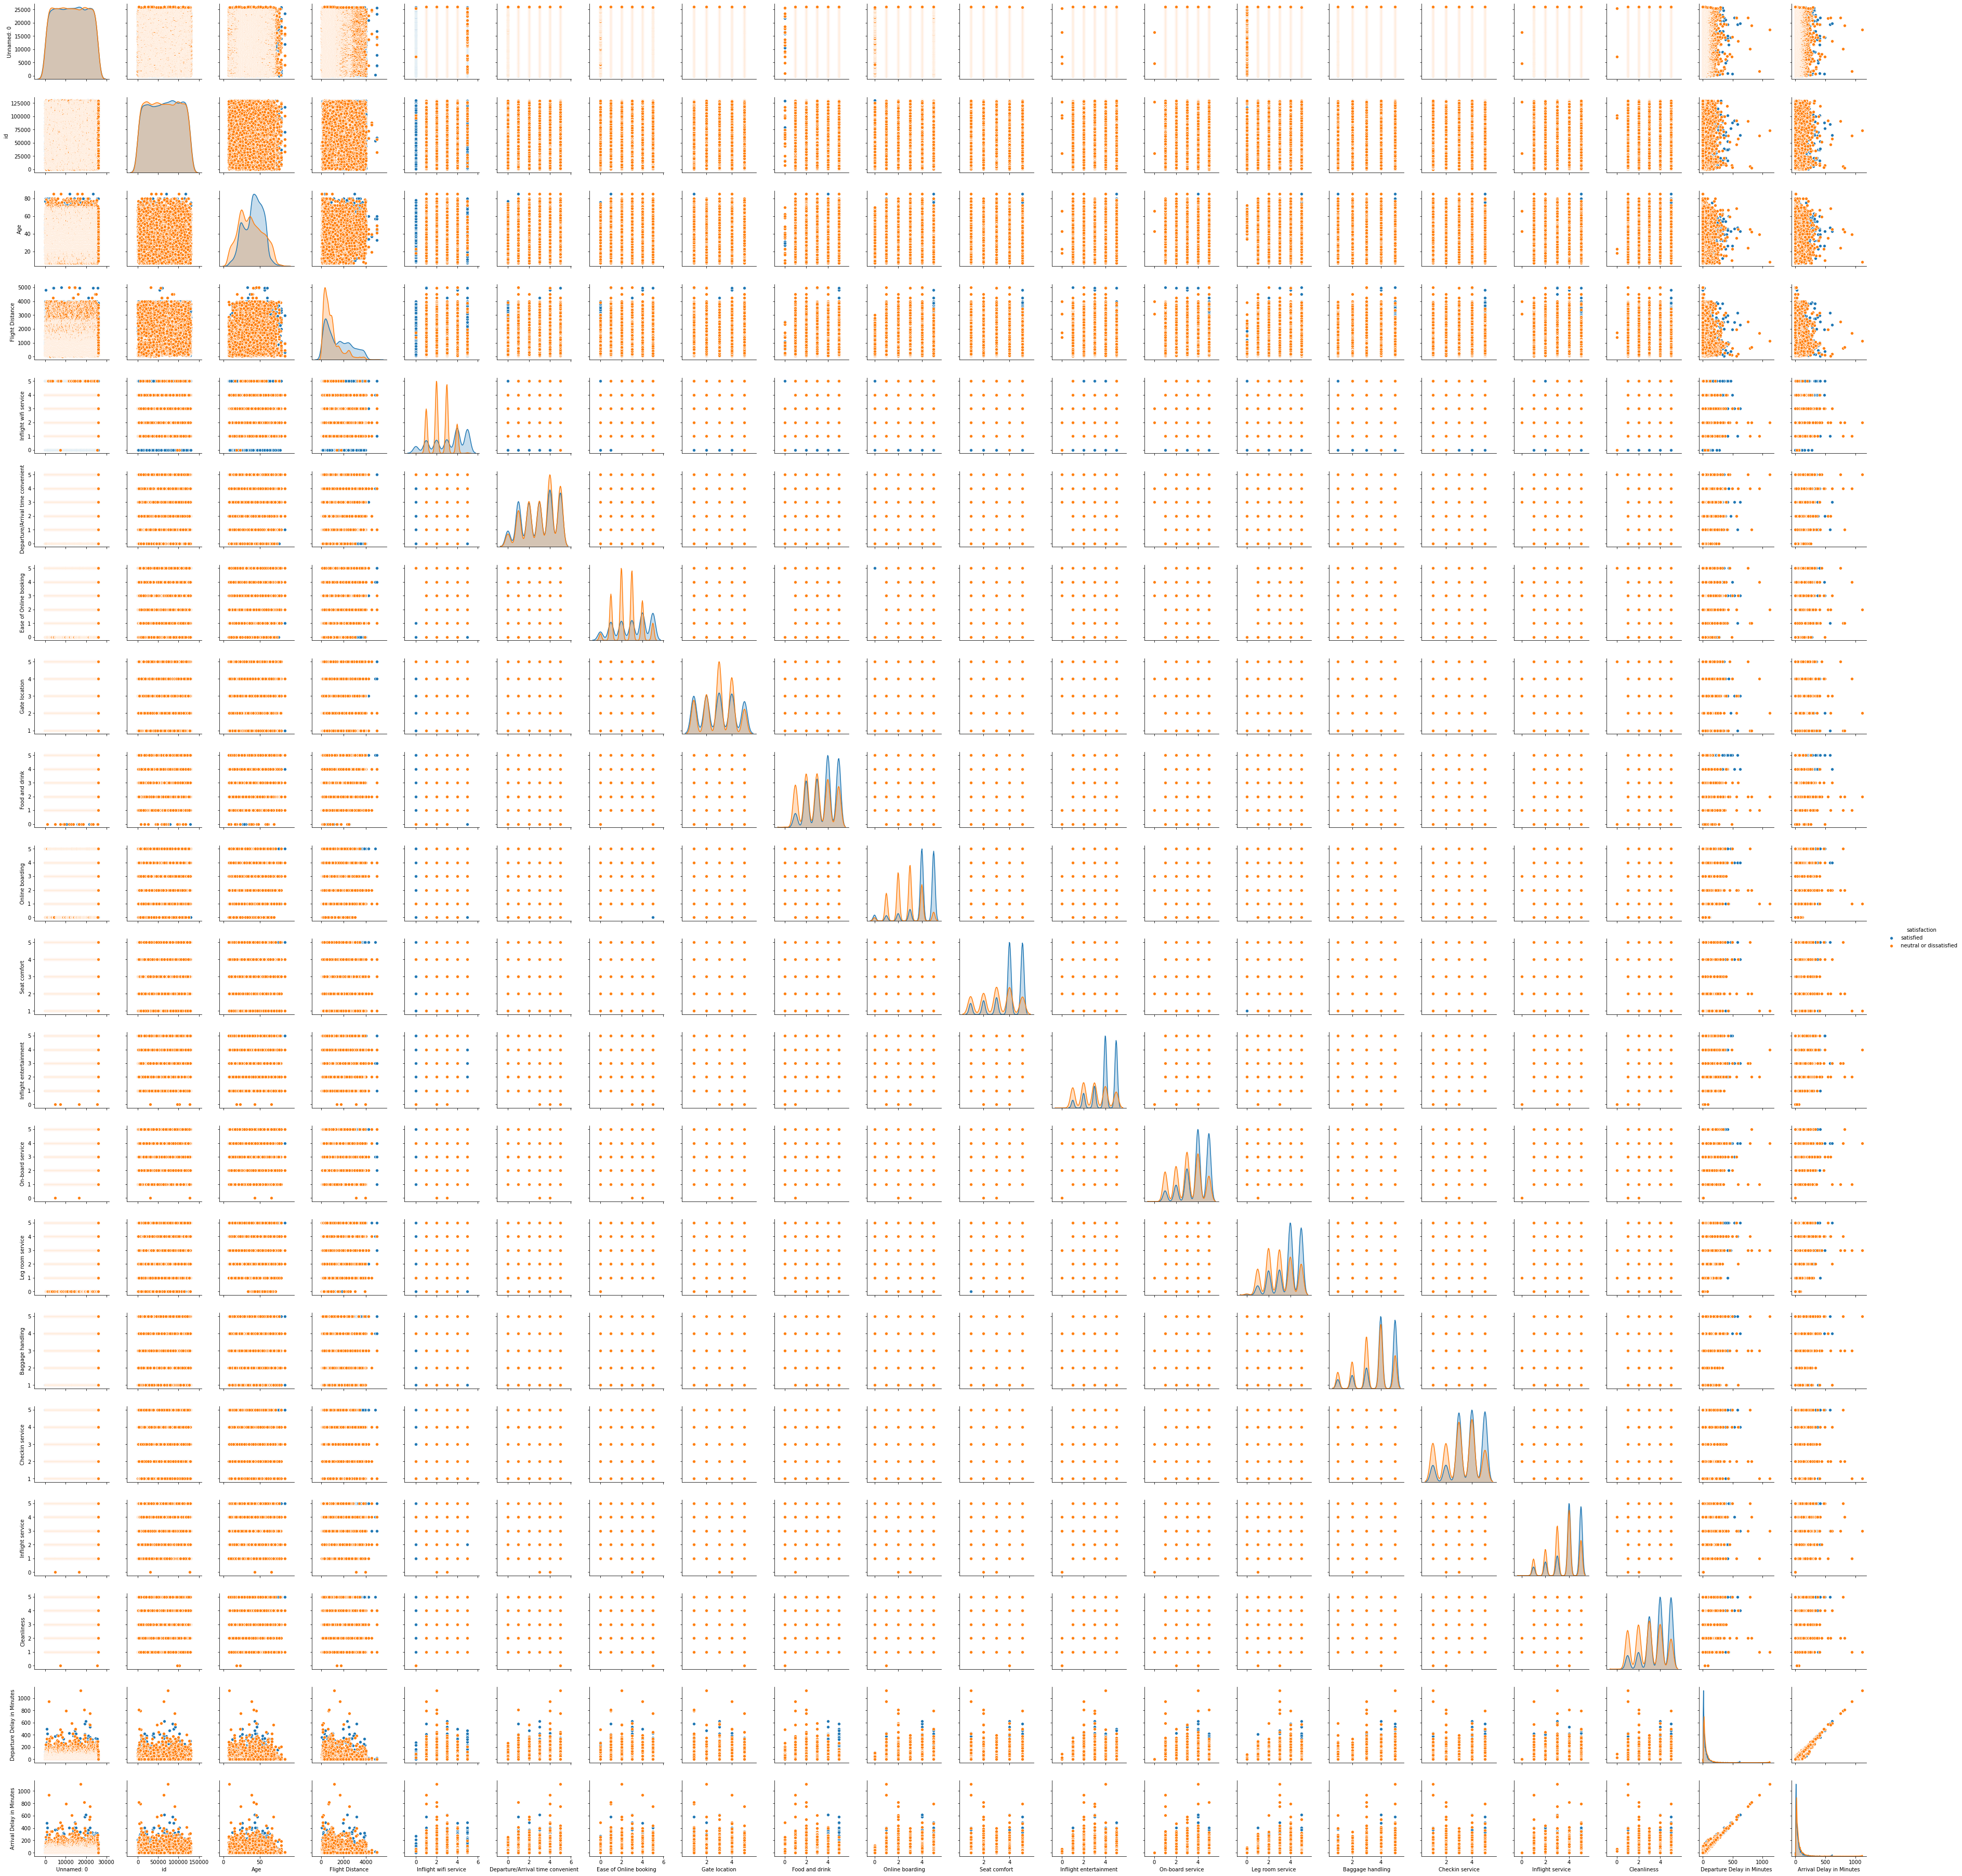

In [6]:
sns.pairplot(df, hue="satisfaction")
plt.show()

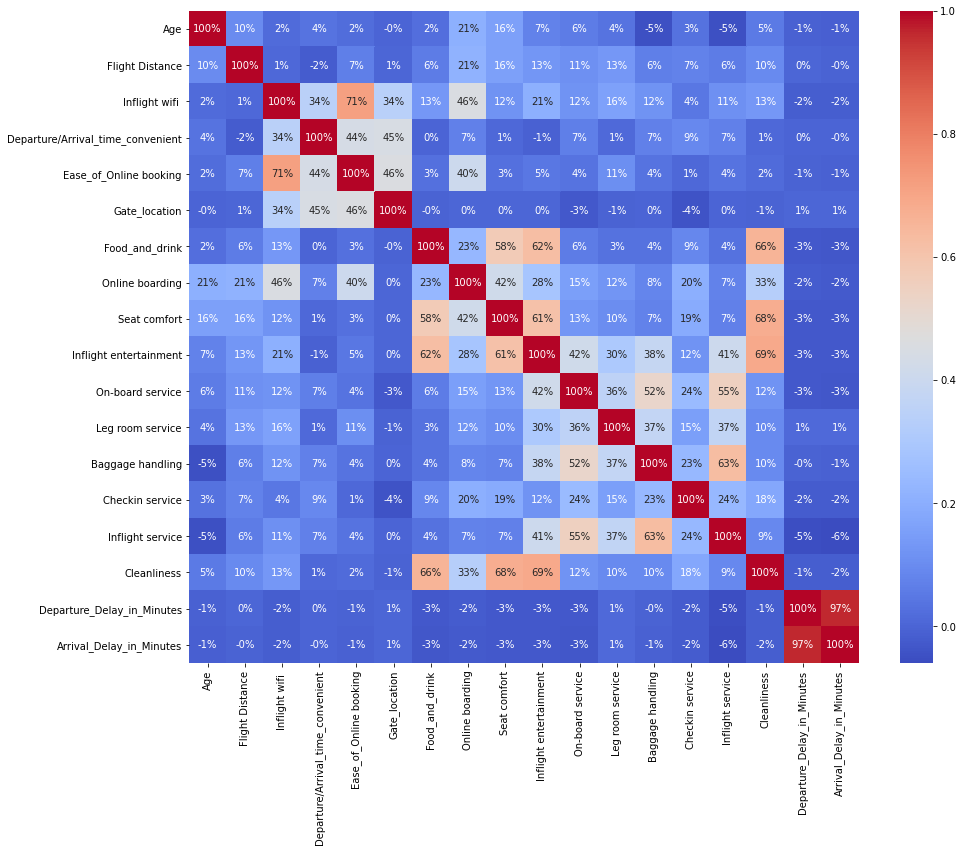

In [10]:
# A glance at the correlations
ax = plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt='.0%')
plt.show()

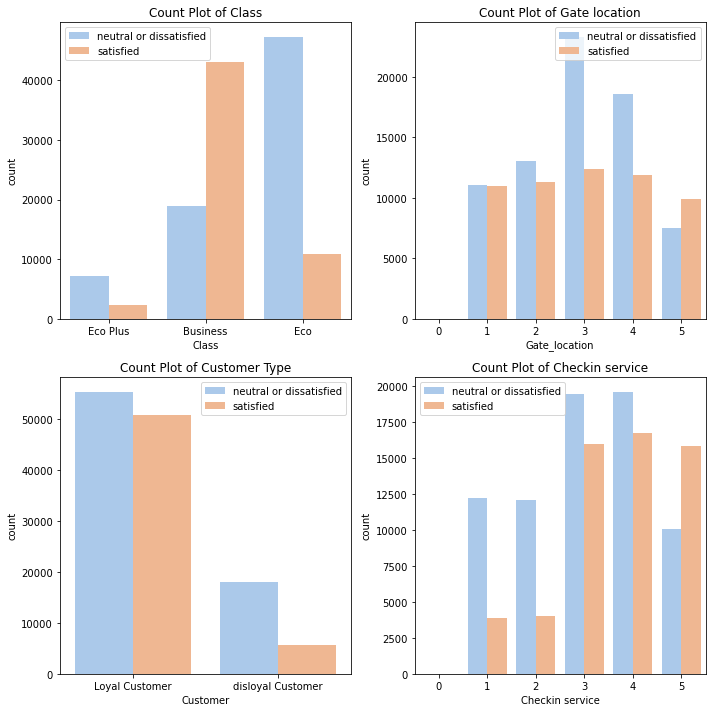

In [13]:
# bar graphy for Class, Gate_loccation, Customer, and Checkin service
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x="Class" , hue="satisfaction", palette="pastel")
plt.title("Count Plot of Class")
plt.legend()

plt.subplot(2,2,2)
sns.countplot(data=df, x="Gate_location" , hue="satisfaction", palette="pastel")
plt.title("Count Plot of Gate location")
plt.legend()

plt.subplot(2,2,3)
sns.countplot(data=df, x="Customer" , hue="satisfaction", palette="pastel")
plt.title("Count Plot of Customer Type")
plt.legend()

plt.subplot(2,2,4)
sns.countplot(data=df, x="Checkin service" , hue="satisfaction", palette="pastel")
plt.title("Count Plot of Checkin service")
plt.legend()
plt.tight_layout()
plt.show()

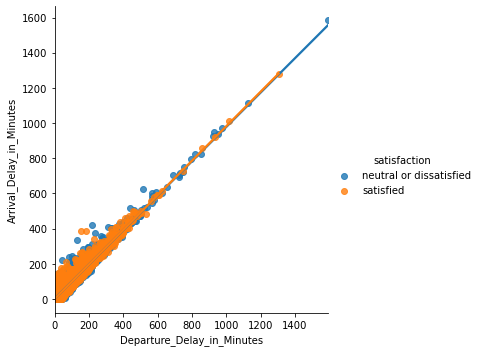

In [14]:
sns.lmplot(x='Departure_Delay_in_Minutes',y='Arrival_Delay_in_Minutes',data=df, hue="satisfaction")

Arrival Delay and Departure delay have a linear relation, so we can drop one colum

In [15]:
# drop one colum 'Arrival_Delay_in_Minutes' in df1a and test_df1a
df1a = df.drop(columns=['Arrival_Delay_in_Minutes'])
test_df1a = test_df1.drop(columns=['Arrival_Delay_in_Minutes'])

In [16]:
#print colums
print(df1a.columns)

Index(['Gender', 'Customer', 'Age', 'Type_of_Travel', 'Class',
       'Flight Distance', 'Inflight wifi ',
       'Departure/Arrival_time_convenient', 'Ease_of_Online booking',
       'Gate_location', 'Food_and_drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'satisfaction'],
      dtype='object')


In [17]:
#import sklearn modules, make_column_transformer OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
import scipy as sp

categorical_columns = ['Gender', 'Customer', 'Type_of_Travel', 'Class']
numerical_columns = ['Age','Flight Distance','Inflight wifi',
                     'Departure/Arrival_time_convenient','Ease_of_Online booking',
                     'Gate_location','Food_and_drink','Online boarding',
                     'Seat comfort','Inflight entertainment','On-board service',
                     'Leg room service','Baggage handling','Checkin service',
                     'Inflight service','Cleanliness','Departure_Delay_in_Minutes']

# data processing: get_dummies
df2 = df1a.copy()
bin_encoded_df = pd.get_dummies(df2, columns=['Gender','Customer', 'Type_of_Travel', 'Class', 'satisfaction'])
bin_encoded_df.head()

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,1,1,0,0,1,0,0,1,1,0
1,25,235,3,2,3,3,1,3,1,1,...,1,0,1,1,0,1,0,0,1,0
2,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,1,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,0,1,0,1,0,1,0,0,1,0
4,61,214,3,3,3,3,4,5,5,3,...,1,1,0,1,0,1,0,0,0,1


In [18]:
test2 = test_df1a.copy()
bin_test_df = pd.get_dummies(test2, columns=['Gender','Customer', 'Type_of_Travel', 'Class', 'satisfaction'])
bin_test_df.head()

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,...,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,52,160,5,4,3,4,3,4,3,5,...,0,1,0,1,0,0,1,0,0,1
1,36,2863,1,1,3,1,5,4,5,4,...,0,1,0,1,0,1,0,0,0,1
2,20,192,2,0,2,4,2,2,2,2,...,1,0,1,1,0,0,1,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,1,1,0,1,0,1,0,0,0,1
4,49,1182,2,3,4,3,4,1,2,2,...,0,1,0,1,0,0,1,0,0,1


In [19]:
bin_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 28 columns):
 #   Column                                Non-Null Count   Dtype
---  ------                                --------------   -----
 0   Age                                   129880 non-null  int64
 1   Flight Distance                       129880 non-null  int64
 2   Inflight wifi                         129880 non-null  int64
 3   Departure/Arrival_time_convenient     129880 non-null  int64
 4   Ease_of_Online booking                129880 non-null  int64
 5   Gate_location                         129880 non-null  int64
 6   Food_and_drink                        129880 non-null  int64
 7   Online boarding                       129880 non-null  int64
 8   Seat comfort                          129880 non-null  int64
 9   Inflight entertainment                129880 non-null  int64
 10  On-board service                      129880 non-null  int64
 11  Leg room service          

In [20]:
bin_encoded_df.isnull().any()

Age                                     False
Flight Distance                         False
Inflight wifi                           False
Departure/Arrival_time_convenient       False
Ease_of_Online booking                  False
Gate_location                           False
Food_and_drink                          False
Online boarding                         False
Seat comfort                            False
Inflight entertainment                  False
On-board service                        False
Leg room service                        False
Baggage handling                        False
Checkin service                         False
Inflight service                        False
Cleanliness                             False
Departure_Delay_in_Minutes              False
Gender_Female                           False
Gender_Male                             False
Customer_Loyal Customer                 False
Customer_disloyal Customer              False
Type_of_Travel_Business travel    

In [21]:
bin_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Age                                   25976 non-null  int64
 1   Flight Distance                       25976 non-null  int64
 2   Inflight wifi                         25976 non-null  int64
 3   Departure/Arrival_time_convenient     25976 non-null  int64
 4   Ease_of_Online booking                25976 non-null  int64
 5   Gate_location                         25976 non-null  int64
 6   Food_and_drink                        25976 non-null  int64
 7   Online boarding                       25976 non-null  int64
 8   Seat comfort                          25976 non-null  int64
 9   Inflight entertainment                25976 non-null  int64
 10  On-board service                      25976 non-null  int64
 11  Leg room service                      259

In [22]:
bin_test_df.isnull().any()

Age                                     False
Flight Distance                         False
Inflight wifi                           False
Departure/Arrival_time_convenient       False
Ease_of_Online booking                  False
Gate_location                           False
Food_and_drink                          False
Online boarding                         False
Seat comfort                            False
Inflight entertainment                  False
On-board service                        False
Leg room service                        False
Baggage handling                        False
Checkin service                         False
Inflight service                        False
Cleanliness                             False
Departure_Delay_in_Minutes              False
Gender_Female                           False
Gender_Male                             False
Customer_Loyal Customer                 False
Customer_disloyal Customer              False
Type_of_Travel_Business travel    

In [23]:
# drop define the features set.
X = bin_encoded_df.drop(columns=['satisfaction_neutral or dissatisfied','satisfaction_satisfied'])
X.head()

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,25,0,1,1,0,0,1,0,0,1
1,25,235,3,2,3,3,1,3,1,1,...,1,0,1,0,1,1,0,1,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,0,1,0,1,0,1,0,1,0,0
3,25,562,2,5,5,5,2,2,2,2,...,11,1,0,1,0,1,0,1,0,0
4,61,214,3,3,3,3,4,5,5,3,...,0,0,1,1,0,1,0,1,0,0


In [24]:
test = bin_test_df.drop(columns=['satisfaction_neutral or dissatisfied','satisfaction_satisfied'])
test.head()

,Age,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,...,Departure_Delay_in_Minutes,Gender_Female,Gender_Male,Customer_Loyal Customer,Customer_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,50,1,0,1,0,1,0,0,1,0
1,36,2863,1,1,3,1,5,4,5,4,...,0,1,0,1,0,1,0,1,0,0
2,20,192,2,0,2,4,2,2,2,2,...,0,0,1,0,1,1,0,0,1,0
3,44,3377,0,0,0,2,3,4,4,1,...,0,0,1,1,0,1,0,1,0,0
4,49,1182,2,3,4,3,4,1,2,2,...,0,1,0,1,0,1,0,0,1,0


In [25]:
# Create target
y = bin_encoded_df["satisfaction_satisfied"].ravel()
y[:5]

array([0, 0, 1, 0, 1], dtype=uint8)

In [26]:
# Test results
test_y = bin_test_df["satisfaction_satisfied"].ravel()
test_y[:5]

array([1, 1, 0, 1, 1], dtype=uint8)

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.feature_selection import SelectFromModel

In [28]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, train_size=0.70)

In [29]:
# the following code, we can see the data's 75-25 split.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(test.shape)

(90916, 26)
(38964, 26)
(90916,)
(38964,)
(25976, 26)


In [30]:
# Creating a StandardScaler instance.
# scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
# X_scaler = scaler.fit(X_train)
# Scaling the data.
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# test_scaled = X_scaler.transform(test)
# X_train_scaled

In [31]:
# create a random forest instance using the random forest classifier,
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',max_iter=10000, random_state=1)

# Fitting the model
classifier.fit(X_train, y_train)

# Make Predictions Using the Testing Data
y_pred = classifier.predict(X_test)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, y_pred)
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

In [32]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, y_pred)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,19896,2153
Actual 1,2764,14151


Accuracy Score : 0.8738065906991068
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22049
           1       0.87      0.84      0.85     16915

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964



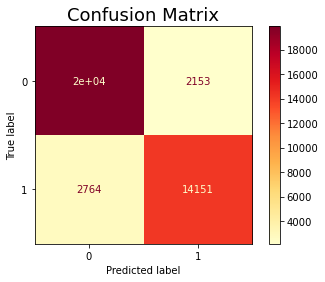

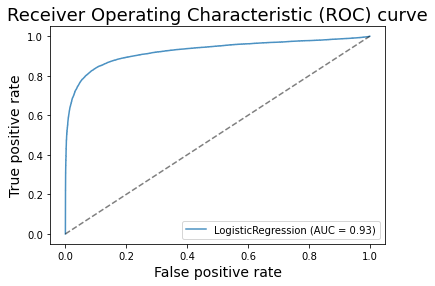

In [39]:
    # plot confusion_matrix
    plot_confusion_matrix(classifier, X_test, y_test, cmap="YlOrRd")
    plt.title("Confusion Matrix", fontsize=18)
    plt.grid(b=False)
    plt.show()
    # plot roc curve
    plot_roc_curve(classifier, X_test, y_test, alpha=0.8)
    plt.plot([0,1],[0,1],"--",color="k",alpha=0.5)
    plt.title("Receiver Operating Characteristic (ROC) curve", fontsize=18)
    plt.xlabel('False positive rate', fontsize=14)
    plt.ylabel('True positive rate', fontsize=14)
    plt.legend(loc=4,prop={'size':10})
    plt.show()

In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
pd.set_option('display.max_rows', None)

In [53]:
#loop
names = ["LogisticReg","ExtraTrees","DecisionTree","RandomForest","AdaBoost", "GradientBoosting"]
clfs = [
LogisticRegression(solver='lbfgs',max_iter=10000, random_state=1),
ExtraTreesClassifier(n_estimators=300, max_depth=10, class_weight='balanced'),
DecisionTreeClassifier(max_depth=5),
RandomForestClassifier(n_estimators=128, random_state=78, class_weight='balanced'),
AdaBoostClassifier(n_estimators=200),
GradientBoostingClassifier(n_estimators=200,max_depth=5)
]

In [54]:
for name,clf in zip(names,clfs):
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)
    print(name+"Classifier Report")
    print(f"Accuracy Score : {acc_score}")
    print(classification_report(y_test, predictions))

LogisticRegClassifier Report
Accuracy Score : 0.8738065906991068
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     22049
           1       0.87      0.84      0.85     16915

    accuracy                           0.87     38964
   macro avg       0.87      0.87      0.87     38964
weighted avg       0.87      0.87      0.87     38964

ExtraTreesClassifier Report
Accuracy Score : 0.9389693049994867
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     22049
           1       0.93      0.93      0.93     16915

    accuracy                           0.94     38964
   macro avg       0.94      0.94      0.94     38964
weighted avg       0.94      0.94      0.94     38964

DecisionTreeClassifier Report
Accuracy Score : 0.9048352325223283
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     22049
           1       0.90      0.87      0.8

Roc roc_auc_score:LogisticReg 0.9256064600266138
Roc roc_auc_score:ExtraTrees 0.985695807420677
Roc roc_auc_score:DecisionTree 0.9675738811764575
Roc roc_auc_score:RandomForest 0.9941448216396322
Roc roc_auc_score:AdaBoost 0.9787399673746835
Roc roc_auc_score:GradientBoosting 0.9945759013860069


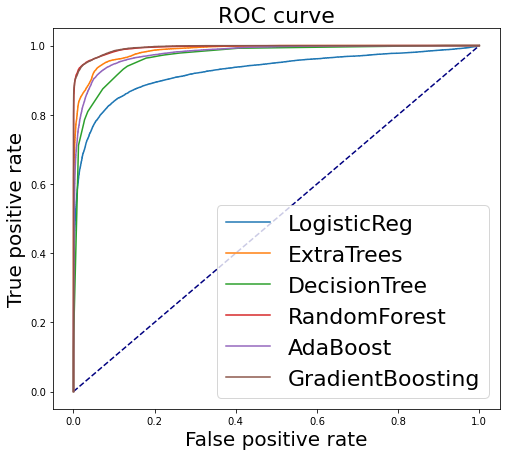

In [48]:
# plot figure
plt.figure(figsize=(8,7))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

#loop for figure 
for name,clf in zip(names,clfs):
    # Fit the model
    clf.fit(X_train,y_train)
    y_proba = clf.predict_proba(X_test)[:,1]
    print("Roc roc_auc_score:"+name, roc_auc_score(y_test, y_proba, average='macro'))
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)


plt.xlabel('False positive rate', fontsize=20)
plt.ylabel('True positive rate', fontsize=20)
plt.title('ROC curve', fontsize=22)
plt.legend(loc='best', fontsize=22)
plt.savefig('1.png')
plt.show() 